<a href="https://colab.research.google.com/github/srivatsakr21/Fashion-MNIST/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.2.0-rc2'

In [3]:
keras.__version__

'2.3.0-tf'

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

In [0]:
X_valid,X_train = X_train_full[:5000]/255,X_train_full[5000:]/255
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]
X_test = X_test/255

In [0]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

**Now we are creating  model using the Sequential API**

In [0]:
model = keras.models.Sequential()

**Now we need to add different layers to the model**


1.   First layer is a Flatten layer that will convert the inputs to a 1d array.
2.   Second layer is a Dense layer with 300 Neurons. Activation function used is ReLU
3.   Third layer is again a Dense layer with 100 Neurons
4.   Fourth layer is the output layer with 10 Neurons(1 for each class) and the activation function is Softmax



In [0]:
  model.add(keras.layers.Flatten(input_shape=[28,28]))
  model.add(keras.layers.Dense(300,activation='relu'))
  model.add(keras.layers.Dense(100,activation='relu'))
  model.add(keras.layers.Dense(10,activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [0]:
hidden1 = model.layers[1]

In [0]:
weights, biases = hidden1.get_weights()

In [15]:
weights

array([[-0.04912429,  0.04234741,  0.00713722, ...,  0.06191996,
         0.05158433, -0.00666188],
       [-0.06179382, -0.00877282, -0.02850429, ...,  0.05552097,
        -0.05068824, -0.05405372],
       [ 0.06129542, -0.04519238,  0.03581738, ..., -0.01234005,
        -0.0283003 ,  0.02439549],
       ...,
       [-0.00336406, -0.00917996,  0.04841366, ...,  0.06773992,
        -0.01489054, -0.02066785],
       [ 0.01313793, -0.03999306,  0.04163112, ..., -0.01420431,
        -0.03747833,  0.03746878],
       [-0.0533177 , -0.04597843,  0.07250516, ..., -0.06039892,
        -0.00901312, -0.06167134]], dtype=float32)

In [16]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

**Once the model is built, compile the model and specify the loss function and any other metric that the model should calculate**

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

**Now fit the model**

In [18]:
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7332 - accuracy: 0.7576 - val_loss: 0.5019 - val_accuracy: 0.8300
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4908 - accuracy: 0.8301 - val_loss: 0.4411 - val_accuracy: 0.8500
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4459 - accuracy: 0.8445 - val_loss: 0.4266 - val_accuracy: 0.8524
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4194 - accuracy: 0.8533 - val_loss: 0.3917 - val_accuracy: 0.8654
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3981 - accuracy: 0.8586 - val_loss: 0.3945 - val_accuracy: 0.8630
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3827 - accuracy: 0.8646 - val_loss: 0.3879 - val_accuracy: 0.8622
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3679 - accuracy: 0.8707 - val_loss: 0.3571 - val_accuracy:

In [19]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [21]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [22]:
history.history

{'accuracy': [0.7575818300247192,
  0.830054521560669,
  0.8444727063179016,
  0.8533272743225098,
  0.8585636615753174,
  0.8645636439323425,
  0.8706545233726501,
  0.873054563999176,
  0.8777272701263428,
  0.8797272443771362,
  0.8827999830245972,
  0.8844000101089478,
  0.8871636390686035,
  0.8908727169036865,
  0.8911091089248657,
  0.8941636085510254,
  0.8958545327186584,
  0.8977090716362,
  0.9000545740127563,
  0.9024909138679504,
  0.9043636322021484,
  0.9064363837242126,
  0.907909095287323,
  0.9103272557258606,
  0.9121999740600586,
  0.9118545651435852,
  0.9135090708732605,
  0.9159636497497559,
  0.9178727269172668,
  0.9182363748550415],
 'loss': [0.733186662197113,
  0.490817666053772,
  0.44594794511795044,
  0.41940152645111084,
  0.39807409048080444,
  0.38273316621780396,
  0.36792561411857605,
  0.3573564291000366,
  0.3462245464324951,
  0.337624728679657,
  0.328439325094223,
  0.32040324807167053,
  0.31377992033958435,
  0.30553826689720154,
  0.299714088

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

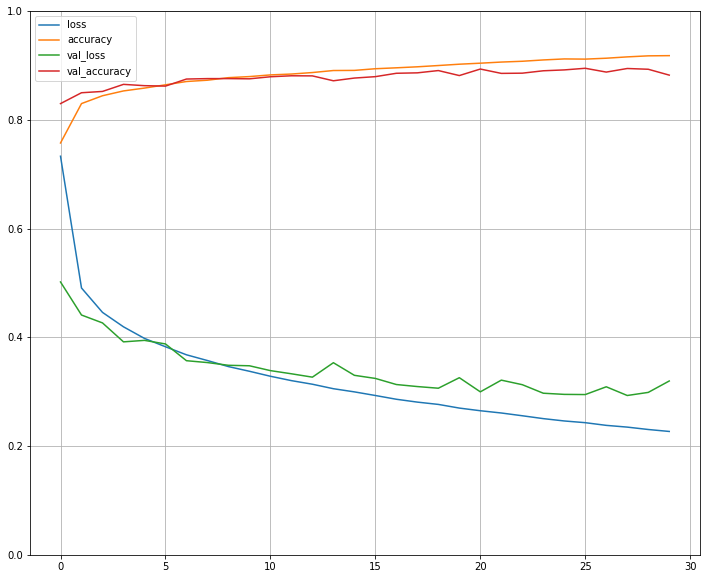

In [29]:
pd.DataFrame(history.history).plot(figsize=(12,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [30]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3544 - accuracy: 0.8742


[0.35441598296165466, 0.8741999864578247]

In [33]:
x_new = X_test[:3]
y_pred = model.predict(x_new)
y_pred.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 0.96, 0.  , 0.03, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [34]:
y_pred = model.predict_classes(x_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [0]:
import numpy as np

In [38]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [39]:
y_test[:3]

array([9, 2, 1], dtype=uint8)